## Model Training

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv("E:/VS_Code/Projects/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD/data/processed/processed_customer_churn_data.csv")

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services,has_extra_internet_charges,churned
765,1113-IUJYX,Female,59,Yes,0,Winnetka,91306,34.209532,-118.577563,3,14,No Offer,Yes,5,No,Yes,Fiber Optic,23.0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,105.95,1348.90,0.0,0,78.82,1427.72,Churned,0,0.550476,1-2 Years,7,False,3,0,True
4742,6682-VCIXC,Female,61,Yes,0,Mad River,95552,40.390301,-123.412327,2,43,Offer B,No,0,No,Yes,Cable,6.0,Yes,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Bank Withdrawal,51.25,2151.60,0.0,0,0.00,2151.60,Stayed,1,0.116996,2-4 Years,5,False,3,0,False
3841,5394-MEITZ,Female,26,Yes,0,Corona Del Mar,92625,33.600987,-117.862734,5,60,No Offer,Yes,14,No,Yes,Cable,42.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,80.60,4946.70,0.0,0,840.00,5786.70,Stayed,0,0.550476,4+ Years,7,True,3,0,False
842,1223-UNPKS,Male,55,Yes,1,Wendel,96136,40.345949,-120.081187,4,20,No Offer,Yes,3,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,20.05,400.00,0.0,0,77.40,477.40,Stayed,0,0.550476,1-2 Years,0,False,0,0,False
1238,1834-WULEG,Male,61,Yes,2,Nevada City,95959,39.333737,-120.858667,5,24,Offer C,Yes,40,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,One Year,No,Mailed Check,20.25,439.75,0.0,0,979.44,1419.19,Stayed,1,0.058924,1-2 Years,0,False,0,0,False
2733,3890-RTCMS,Male,29,No,0,Millville,96062,40.531257,-122.148139,0,16,No Offer,Yes,48,No,Yes,DSL,59.0,No,No,No,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,49.45,799.00,0.0,0,775.20,1574.20,Stayed,0,0.550476,1-2 Years,2,False,1,0,False


In [49]:
df['customer_status'] = df['churned'].apply(lambda x : 1 if x == True else 0)

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services,has_extra_internet_charges,churned
4960,6982-SSHFK,Male,45,No,0,Fresno,93703,36.768774,-119.762633,0,1,Offer E,Yes,32,No,Yes,DSL,12.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Mailed Check,44.40,44.40,0.0,0,32.44,76.84,1,1,0.114298,0-1 Year,1,False,0,0,True
944,1370-GGAWX,Female,55,No,0,Beverly Hills,90211,34.063947,-118.383001,0,46,No Offer,Yes,33,Yes,Yes,Fiber Optic,3.0,No,Yes,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,94.15,4408.45,0.0,0,1526.28,5934.73,0,0,0.550476,2-4 Years,6,True,2,0,False
5225,7354-OIJLX,Male,52,No,0,Inglewood,90305,33.958134,-118.330905,0,9,Offer E,Yes,7,Yes,Yes,Fiber Optic,11.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,75.85,724.65,0.0,0,65.88,790.53,0,1,0.114298,0-1 Year,2,False,0,0,False
6539,9282-IZGQK,Female,51,No,0,Irvine,92612,33.643095,-117.810896,0,1,Offer E,Yes,30,Yes,Yes,Fiber Optic,30.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.00,85.00,0.0,0,30.52,115.52,1,1,0.114298,0-1 Year,4,False,0,0,True
3448,4884-ZTHVF,Female,80,No,0,Santa Cruz,95065,37.031404,-121.981865,0,8,No Offer,Yes,39,No,Yes,Fiber Optic,28.0,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,87.10,713.60,0.0,0,312.08,1025.68,0,0,0.550476,0-1 Year,3,False,1,0,False
7003,9938-PRCVK,Female,45,Yes,1,Stevenson Ranch,91381,34.364153,-118.615583,1,41,No Offer,Yes,23,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,19.70,804.25,0.0,0,981.95,1786.20,0,0,0.550476,2-4 Years,0,False,0,0,False


In [50]:
df[['churned', 'customer_status']]

,churned,customer_status
0,False,0
1,False,0
2,True,1
3,True,1
4,True,1
...,...,...
7038,False,0
7039,True,1
7040,False,0
7041,False,0


In [51]:
df.shape

(7043, 44)

#### **MODEL with Hyperparameter Tuning**

In [34]:
!pip install category_encoders

In [35]:
!pip install catboost

In [36]:
!pip install optuna

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from category_encoders import CatBoostEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_validate

from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, 
    recall_score, f1_score, confusion_matrix, classification_report
)

from imblearn.over_sampling import SMOTE

In [92]:
import optuna
from optuna.visualization import plot_param_importances, plot_optimization_history
from optuna.exceptions import TrialPruned
from optuna.exceptions import TrialPruned

from typing import Optional, Dict

import joblib

import sys
import os
from src.logger import logging

In [56]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services,has_extra_internet_charges,churned
2611,3721-CNZHX,Male,49,No,0,Berkeley,94704,37.871416,-122.246597,0,15,No Offer,Yes,5,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,One Year,No,Credit Card,19.80,304.60,0.0,0,83.10,387.70,0,0,0.550476,1-2 Years,0,False,0,0,False
2945,4195-PNGZS,Male,23,Yes,3,Irvine,92620,33.716136,-117.752574,1,69,No Offer,Yes,33,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,24.45,1718.20,0.0,0,2283.21,4001.41,0,0,0.550476,4+ Years,1,False,0,0,False
1633,2373-NTKOD,Male,40,No,0,Rancho Cordova,95670,38.602723,-121.279913,0,8,Offer E,Yes,25,No,Yes,Cable,24.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,66.25,546.45,0.0,0,205.76,752.21,0,1,0.114298,0-1 Year,4,False,0,0,False
5543,7803-XOCCZ,Female,54,Yes,2,Anza,92539,33.527605,-116.666551,1,52,Offer B,Yes,31,No,Yes,Fiber Optic,26.0,Yes,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,84.05,4326.80,0.0,0,1661.92,5988.72,0,1,0.116996,4+ Years,4,True,3,0,False
4211,5947-SGKCL,Female,19,Yes,3,San Marino,91108,34.122671,-118.112911,6,15,Offer D,Yes,4,Yes,Yes,Fiber Optic,59.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,105.35,1559.25,0.0,0,62.85,1622.10,0,1,0.085475,1-2 Years,7,False,2,0,False
5219,7343-EOBEU,Male,19,Yes,0,Laguna Niguel,92677,33.529047,-117.701175,9,3,Offer E,Yes,14,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,23.60,89.05,0.0,0,42.30,131.35,0,1,0.114298,0-1 Year,1,False,0,0,False


In [57]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [58]:
num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'customer_status',
 'has_offer',
 'offer_popularity',
 'engagement_score',
 'num_addon_services',
 'has_extra_internet_charges']

In [59]:
cat_cols

['customer_id',
 'gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [60]:
num_cols = [col for col in num_cols if col != 'customer_status']

num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'has_offer',
 'offer_popularity',
 'engagement_score',
 'num_addon_services',
 'has_extra_internet_charges']

In [61]:
cat_cols = [col for col in cat_cols if col != 'customer_id']

cat_cols

['gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [62]:
# Prepare data
X = df[num_cols + cat_cols]
y = df['customer_status']

In [63]:
y.value_counts()

customer_status
0    5174
1    1869
Name: count, dtype: int64

In [64]:
X.shape, y.shape

((7043, 40), (7043,))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [66]:
X_train.shape, X_test.shape

((5634, 40), (1409, 40))

#### Second way of selecting the best feature

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
import mlflow
import mlflow.sklearn
import dagshub
from typing import List, Tuple

# ----------------- Fast Feature Selection -----------------

# --- DAGSHUB INIT ---
dagshub.init(
    repo_owner='Niair',
    repo_name='Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD',
    mlflow=True
)
mlflow.set_tracking_uri("https://dagshub.com/Niair/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD.mlflow")
mlflow.set_experiment("best_features")


# ----------------- Feature Selection with MLflow -----------------
def select_features_with_tracking(
    X: pd.DataFrame,
    y: pd.Series,
    num_cols: List[str],
    cat_cols: List[str],
    top_k_range: List[int],
    random_state: int = 42
) -> Tuple[List[str], pd.DataFrame]:

    # --- Encode categoricals ---
    preprocessor = ColumnTransformer(
        transformers=[(
            'cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
            cat_cols)],
        remainder='passthrough',
        verbose_feature_names_out=False
    )
    X_proc = preprocessor.fit_transform(X)
    feature_names = cat_cols + num_cols
    X_proc = pd.DataFrame(X_proc, columns=feature_names, index=X.index)

    # --- Train/Val Split ---
    X_train_fs, X_val_fs, y_train_fs, y_val_fs = train_test_split(
        X_proc, y, test_size=0.2, stratify=y, random_state=random_state
    )

    # --- Class imbalance ---
    class_counts = y_train_fs.value_counts()
    scale_pos_weight = class_counts[0] / class_counts[1]

    models = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=random_state, class_weight='balanced'),
        "XGBoost": XGBClassifier(n_estimators=100, random_state=random_state, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight),
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=random_state, class_weight='balanced')
    }

    # --- Feature importances ---
    feature_importances = pd.DataFrame(index=X_proc.columns)

    for name, model in models.items():
        model.fit(X_train_fs, y_train_fs)
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_

    feature_importances['Average'] = feature_importances.mean(axis=1)
    feature_importances.sort_values('Average', ascending=False, inplace=True)

    best_features_overall = []
    best_auc = 0.0

    for k in top_k_range:
        top_features = feature_importances['Average'].nlargest(k).index.tolist()

        with mlflow.start_run(run_name=f"{k}_features"):
            X_train_k = X_train_fs[top_features]
            X_val_k = X_val_fs[top_features]

            clf = RandomForestClassifier(random_state=random_state, class_weight='balanced')
            clf.fit(X_train_k, y_train_fs)
            y_pred = clf.predict(X_val_k)
            y_proba = clf.predict_proba(X_val_k)[:, 1]

            acc = accuracy_score(y_val_fs, y_pred)
            f1 = f1_score(y_val_fs, y_pred)
            auc = roc_auc_score(y_val_fs, y_proba)

            mlflow.log_param("num_features", k)
            mlflow.log_param("selected_features", top_features)
            mlflow.log_metric("accuracy", acc)
            mlflow.log_metric("f1_score", f1)
            mlflow.log_metric("roc_auc", auc)

            if auc > best_auc:
                best_auc = auc
                best_features_overall = top_features

    # --- Plot final importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances['Average'], y=feature_importances.index, palette='viridis')
    plt.title('Feature Importances (Average over Models)')
    plt.tight_layout()
    plt.savefig("notebooks/feature_importance_graph/feature_importance_plot.png")
    mlflow.log_artifact("notebooks/feature_importance_graph/feature_importance_plot.png")

    return best_features_overall, feature_importances


Initialized MLflow to track repo "Niair/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD"

Repository Niair/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD initialized!

[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2491
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
🏃 View run 10_features at: https://dagshub.com/Niair/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD.mlflow/#/experiments/21/runs/de05fdc4ff924bfc965f0e72402fc32a
🧪 View experiment at: https://dagshub.com/Niair/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD.mlflow/#/experiments/21
🏃 View run 11_features at: https://dagshub.com/Niair/Customer_Churn_Prediction_using_MLOpps_MLflow_AWS_CI-CD.mlflow/#/experiments/21/runs/f4efc5cf38934b4181b6529fb88706cc
🧪 View experiment at: https://dagshub.com

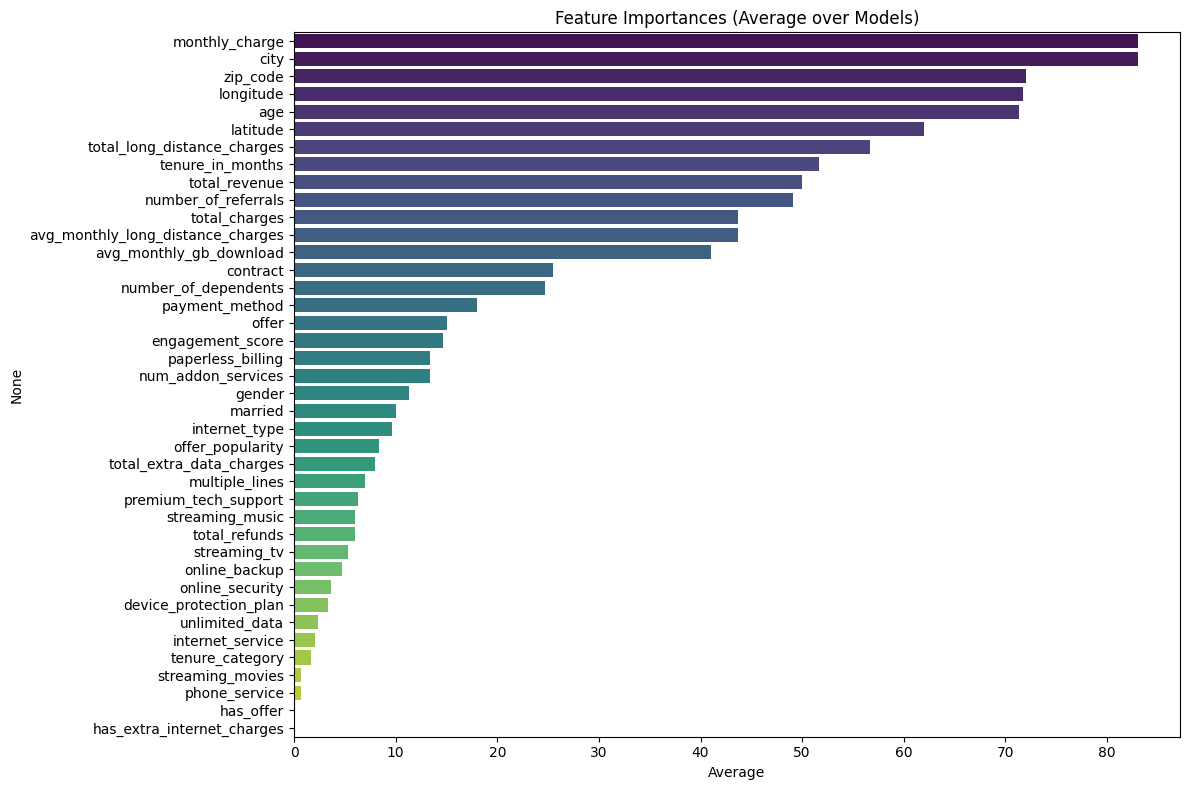

In [30]:
top_k_values = list(range(10, 31))  # Try from 10 to 30 features

best_features, fi_df = select_features_with_tracking(
    X=X_train,
    y=y_train,
    num_cols=num_cols,
    cat_cols=cat_cols,
    top_k_range=top_k_values,
    random_state=42
)

print(f"\nBest {len(best_features)} features (based on best AUC):\n{best_features}")

In [32]:
df[best_features]

,monthly_charge,city,zip_code,longitude,age,latitude,total_long_distance_charges,tenure_in_months,total_revenue,number_of_referrals,total_charges,avg_monthly_long_distance_charges,avg_monthly_gb_download,contract,number_of_dependents,payment_method,offer
0,65.60,Frazier Park,93225,-118.999073,37,34.827662,381.51,9,974.81,2,593.30,42,16.0,One Year,0,Credit Card,No Offer
1,-4.00,Glendale,91206,-118.203869,46,34.162515,96.21,9,610.28,0,542.40,10,10.0,Month-to-Month,0,Credit Card,No Offer
2,73.90,Costa Mesa,92627,-117.922613,50,33.645672,134.60,4,415.45,0,280.85,33,30.0,Month-to-Month,0,Bank Withdrawal,Offer E
3,98.00,Martinez,94553,-122.115432,78,38.014457,361.66,13,1599.51,1,1237.85,27,4.0,Month-to-Month,0,Bank Withdrawal,Offer D
4,83.90,Camarillo,93010,-119.079903,75,34.227846,22.14,3,289.54,3,267.40,7,11.0,Month-to-Month,0,Credit Card,No Offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,55.15,La Mesa,91941,-116.997260,20,32.759327,606.84,13,1349.74,0,742.90,46,59.0,One Year,0,Credit Card,Offer D
7039,85.10,Riverbank,95367,-120.954271,40,37.734971,356.40,22,2230.10,1,1873.70,16,17.0,Month-to-Month,0,Bank Withdrawal,Offer D
7040,50.30,Elk,95432,-123.645121,22,39.108252,37.24,2,129.99,0,92.75,18,51.0,Month-to-Month,0,Credit Card,Offer E
7041,67.85,Solana Beach,92075,-117.263628,21,33.001813,142.04,67,4769.69,5,4627.65,2,58.0,Two Year,0,Credit Card,Offer A


best number of features that i am thinking of using is 23 (i took thses column names from my mlflow records of best_features)

In [77]:
top_features = ['monthly_charge', 'city', 'zip_code', 'longitude', 'age', 'latitude', 
 'total_long_distance_charges', 'tenure_in_months', 'total_revenue', 'number_of_referrals', 
 'total_charges', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'contract', 
 'number_of_dependents', 'payment_method', 'offer', 'engagement_score', 'paperless_billing', 'num_addon_services', 
 'gender', 'married', 'internet_type']

In [78]:
# Filter datasets
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [79]:
sampleN = df[top_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
sampleC = df[top_features].select_dtypes(include=['object', 'category']).columns.tolist()

In [80]:
sampleN

['monthly_charge',
 'zip_code',
 'longitude',
 'age',
 'latitude',
 'total_long_distance_charges',
 'tenure_in_months',
 'total_revenue',
 'number_of_referrals',
 'total_charges',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'number_of_dependents',
 'engagement_score',
 'num_addon_services']

In [81]:
sampleC

['city',
 'contract',
 'payment_method',
 'offer',
 'paperless_billing',
 'gender',
 'married',
 'internet_type']

In [82]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: customer_status, Length: 7043, dtype: int64

In [83]:
tempdf = df[top_features]

tempdf['customer_status'] = y

tempdf.sample(6)

,monthly_charge,city,zip_code,longitude,age,latitude,total_long_distance_charges,tenure_in_months,total_revenue,number_of_referrals,total_charges,avg_monthly_long_distance_charges,avg_monthly_gb_download,contract,number_of_dependents,payment_method,offer,engagement_score,paperless_billing,num_addon_services,gender,married,internet_type,customer_status
1313,20.10,Colfax,95713,-120.894014,23,39.084645,140.40,10,324.80,4,184.40,14,0.0,One Year,0,Credit Card,No Offer,0,No,0,Female,Yes,No Internet,0
3916,111.15,Rocklin,95765,-121.281856,29,38.823278,1253.78,41,5760.93,0,4507.15,30,59.0,Two Year,3,Bank Withdrawal,No Offer,8,Yes,4,Male,No,Fiber Optic,0
5068,53.80,Mountain Ranch,95246,-120.515133,56,38.264262,247.00,5,540.95,0,283.95,49,22.0,Month-to-Month,0,Bank Withdrawal,No Offer,3,Yes,1,Female,No,Cable,0
4934,79.95,Santa Monica,90404,-118.474222,31,34.026334,2521.80,54,6883.85,2,4362.05,46,75.0,Two Year,8,Bank Withdrawal,Offer B,3,Yes,2,Male,Yes,Fiber Optic,0
3336,84.60,Palo Alto,94304,-122.177746,68,37.386978,26.72,4,386.82,0,360.10,6,17.0,Month-to-Month,0,Bank Withdrawal,No Offer,3,Yes,0,Female,No,Cable,1
2432,79.70,San Jose,95128,-121.936285,44,37.316146,585.20,70,6328.50,3,5743.30,8,19.0,Two Year,1,Bank Withdrawal,Offer A,7,No,4,Female,Yes,DSL,0


In [84]:
tempdf.shape

(7043, 24)

In [85]:
tempdf.to_csv('../data/processed/best_features_customer_churn_data.csv', index=False)

In [ ]:
def optimize_model(
    X_train,
    y_train,
    X_test,
    y_test,
    cat_cols,
    n_trials: int = 50,
):
    X_train = pd.DataFrame(X_train).reset_index(drop=True)
    X_test = pd.DataFrame(X_test).reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop=True)
    y_test = pd.Series(y_test).reset_index(drop=True)

    for col in cat_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].astype(str)
            X_test[col] = X_test[col].astype(str)

    study_results = []
    best_params: Optional[Dict] = None
    best_score: float = -np.inf
    n_classes: int = len(np.unique(y_train))
    average_method: str = "binary" if n_classes == 2 else "weighted"

    apply_sampling = True  # Moved outside objective()

    def objective(trial: optuna.trial.Trial) -> float:
        nonlocal best_params, best_score

        encoder_type = trial.suggest_categorical("encoder", ["onehot", "label", "CatBoost", "TargetEncoder"])
        scaler_type = trial.suggest_categorical("scaler", ["standard", "minmax", "none"])
        model_name = trial.suggest_categorical("model", ["XGBoost", "LightGBM", "CatBoost", "RandomForest"])

        if model_name == "XGBoost":
            params = {
                "n_estimators": trial.suggest_int("xgb_n_estimators", 100, 500),
                "learning_rate": trial.suggest_float("xgb_learning_rate", 0.01, 0.3, log=True),
                "max_depth": trial.suggest_int("xgb_max_depth", 3, 10),
                "subsample": trial.suggest_float("xgb_subsample", 0.6, 1.0),
                "colsample_bytree": trial.suggest_float("xgb_colsample_bytree", 0.6, 1.0),
            }
        elif model_name == "LightGBM":
            params = {
                "n_estimators": trial.suggest_int("lgb_n_estimators", 100, 500),
                "learning_rate": trial.suggest_float("lgb_learning_rate", 0.01, 0.3, log=True),
                "num_leaves": trial.suggest_int("lgb_num_leaves", 31, 511),
                "max_depth": trial.suggest_int("lgb_max_depth", -1, 10),
                "min_child_samples": trial.suggest_int("lgb_min_child_samples", 5, 100),
            }
        elif model_name == "CatBoost":
            params = {
                "iterations": trial.suggest_int("cb_iterations", 100, 500),
                "learning_rate": trial.suggest_float("cb_learning_rate", 0.01, 0.3, log=True),
                "depth": trial.suggest_int("cb_depth", 4, 10),
                "l2_leaf_reg": trial.suggest_float("cb_l2_leaf_reg", 1e-3, 10.0, log=True),
            }
        else:
            params = {
                "n_estimators": trial.suggest_int("rf_n_estimators", 100, 500),
                "max_depth": trial.suggest_int("rf_max_depth", 3, 30),
                "min_samples_split": trial.suggest_int("rf_min_samples_split", 2, 20),
                "min_samples_leaf": trial.suggest_int("rf_min_samples_leaf", 1, 20),
            }

        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        fold_scores = []

        for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
            X_fold_train, X_fold_val = X_train.iloc[train_idx].copy(), X_train.iloc[val_idx].copy()
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            for col in cat_cols:
                if col not in X_fold_train.columns:
                    continue
                if encoder_type == "onehot":
                    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
                    ohe.fit(X_fold_train[[col]])
                    train_encoded = ohe.transform(X_fold_train[[col]])
                    val_encoded = ohe.transform(X_fold_val[[col]])
                    feature_names = ohe.get_feature_names_out([col])
                    X_fold_train = pd.concat([
                        X_fold_train.drop(columns=[col]),
                        pd.DataFrame(train_encoded, columns=feature_names, index=X_fold_train.index),
                    ], axis=1)
                    X_fold_val = pd.concat([
                        X_fold_val.drop(columns=[col]),
                        pd.DataFrame(val_encoded, columns=feature_names, index=X_fold_val.index),
                    ], axis=1)
                elif encoder_type in {"CatBoost", "TargetEncoder"}:
                    encoder_cls = CatBoostEncoder if encoder_type == "CatBoost" else TargetEncoder
                    encoder = encoder_cls()
                    X_fold_train[col] = encoder.fit_transform(X_fold_train[col], y_fold_train).astype(float)
                    X_fold_val[col] = encoder.transform(X_fold_val[col]).astype(float)
                else:
                    le = LabelEncoder()
                    X_fold_train[col] = le.fit_transform(X_fold_train[col])
                    unseen = ~X_fold_val[col].isin(le.classes_)
                    X_fold_val.loc[unseen, col] = -1
                    seen = X_fold_val[col].isin(le.classes_)
                    X_fold_val.loc[seen, col] = le.transform(X_fold_val.loc[seen, col])

            if scaler_type != "none":
                scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
                num_cols = X_fold_train.select_dtypes(include="number").columns
                if len(num_cols):
                    X_fold_train[num_cols] = scaler.fit_transform(X_fold_train[num_cols])
                    X_fold_val[num_cols] = scaler.transform(X_fold_val[num_cols])

            if model_name == "XGBoost":
                model = XGBClassifier(**params, random_state=42, enable_categorical=False,
                                      eval_metric="auc" if n_classes == 2 else "mlogloss",
                                      objective="binary:logistic" if n_classes == 2 else "multi:softprob")
            elif model_name == "LightGBM":
                model = lgb.LGBMClassifier(**params, random_state=42,
                                           objective="binary" if n_classes == 2 else "multiclass",
                                           metric="auc" if n_classes == 2 else "multi_logloss")
            elif model_name == "CatBoost":
                model = CatBoostClassifier(**params, random_state=42, verbose=0,
                                           loss_function="Logloss" if n_classes == 2 else "MultiClass")
            else:
                model = RandomForestClassifier(**params, random_state=42, class_weight="balanced")

            try:
                model.fit(X_fold_train, y_fold_train)
                if hasattr(model, "predict_proba"):
                    y_proba = model.predict_proba(X_fold_val)
                    score = roc_auc_score(y_fold_val, y_proba[:, 1]) if n_classes == 2 else \
                            roc_auc_score(y_fold_val, y_proba, multi_class="ovr")
                else:
                    y_pred = model.predict(X_fold_val)
                    score = roc_auc_score(y_fold_val, y_pred)
            except Exception as e:
                trial.set_user_attr("failed_fold", fold)
                trial.set_user_attr("fail_msg", str(e))
                raise TrialPruned()

            fold_scores.append(score)

        avg_auc = float(np.mean(fold_scores))
        study_results.append({
            "trial": trial.number,
            "model": model_name,
            "encoder": encoder_type,
            "scaler": scaler_type,
            "auc": avg_auc,
            "params": trial.params,
        })
        if avg_auc > best_score:
            best_score = avg_auc
            best_params = trial.params.copy()

        return avg_auc

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # Final training ----------------------
    encoder_type = study.best_params["encoder"]
    scaler_type = study.best_params["scaler"]
    model_name = study.best_params["model"]

    X_train_processed = X_train.copy()
    final_encoders = {}

    for col in cat_cols:
        if col not in X_train_processed.columns:
            continue
        if encoder_type == "onehot":
            ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
            ohe.fit(X_train_processed[[col]])
            encoded = ohe.transform(X_train_processed[[col]])
            feature_names = ohe.get_feature_names_out([col])
            X_train_processed = pd.concat([
                X_train_processed.drop(columns=[col]),
                pd.DataFrame(encoded, columns=feature_names, index=X_train_processed.index),
            ], axis=1)
            final_encoders[col] = ohe
        elif encoder_type in {"CatBoost", "TargetEncoder"}:
            encoder_cls = CatBoostEncoder if encoder_type == "CatBoost" else TargetEncoder
            encoder = encoder_cls()
            X_train_processed[col] = encoder.fit_transform(X_train_processed[col], y_train).astype(float)
            final_encoders[col] = encoder
        else:
            encoder = LabelEncoder()
            X_train_processed[col] = encoder.fit_transform(X_train_processed[col])
            final_encoders[col] = encoder

    final_scaler = None
    if scaler_type != "none":
        scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
        num_cols = X_train_processed.select_dtypes(include="number").columns
        if len(num_cols):
            X_train_processed[num_cols] = scaler.fit_transform(X_train_processed[num_cols])
            final_scaler = scaler

    if apply_sampling:
        sampler = SMOTE(random_state=42)
        X_train_processed, y_train = sampler.fit_resample(X_train_processed, y_train)

    pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    if model_name == "XGBoost":
        final_model = XGBClassifier(
            n_estimators=study.best_params["xgb_n_estimators"],
            learning_rate=study.best_params["xgb_learning_rate"],
            max_depth=study.best_params["xgb_max_depth"],
            subsample=study.best_params["xgb_subsample"],
            colsample_bytree=study.best_params["xgb_colsample_bytree"],
            random_state=42,
            enable_categorical=False,
            eval_metric="auc" if n_classes == 2 else "mlogloss",
            objective="binary:logistic" if n_classes == 2 else "multi:softprob",
            scale_pos_weight=pos_weight,
        )
    elif model_name == "LightGBM":
        final_model = lgb.LGBMClassifier(
            n_estimators=study.best_params["lgb_n_estimators"],
            learning_rate=study.best_params["lgb_learning_rate"],
            num_leaves=study.best_params["lgb_num_leaves"],
            max_depth=study.best_params["lgb_max_depth"],
            min_child_samples=study.best_params["lgb_min_child_samples"],
            random_state=42,
            objective="binary" if n_classes == 2 else "multiclass",
            metric="auc" if n_classes == 2 else "multi_logloss",
            is_unbalance=True,
        )
    elif model_name == "CatBoost":
        final_model = CatBoostClassifier(
            iterations=study.best_params["cb_iterations"],
            learning_rate=study.best_params["cb_learning_rate"],
            depth=study.best_params["cb_depth"],
            l2_leaf_reg=study.best_params["cb_l2_leaf_reg"],
            random_state=42,
            verbose=0,
            loss_function="Logloss" if n_classes == 2 else "MultiClass",
            auto_class_weights="Balanced",
        )
    else:
        final_model = RandomForestClassifier(
            n_estimators=study.best_params["rf_n_estimators"],
            max_depth=study.best_params["rf_max_depth"],
            min_samples_split=study.best_params["rf_min_samples_split"],
            min_samples_leaf=study.best_params["rf_min_samples_leaf"],
            class_weight="balanced",
            random_state=42,
        )

    final_model.fit(X_train_processed, y_train)

    # Evaluate on test set
    X_test_processed = X_test.copy()
    for col in cat_cols:
        if col not in X_test_processed.columns:
            continue
        if encoder_type == "onehot":
            ohe = final_encoders[col]
            encoded = ohe.transform(X_test_processed[[col]])
            feature_names = ohe.get_feature_names_out([col])
            X_test_processed = pd.concat([
                X_test_processed.drop(columns=[col]),
                pd.DataFrame(encoded, columns=feature_names, index=X_test_processed.index),
            ], axis=1)
        elif encoder_type in {"CatBoost", "TargetEncoder"}:
            encoder = final_encoders[col]
            X_test_processed[col] = encoder.transform(X_test_processed[col]).astype(float)
        else:
            encoder = final_encoders[col]
            unseen = ~X_test_processed[col].isin(encoder.classes_)
            X_test_processed.loc[unseen, col] = -1
            seen = X_test_processed[col].isin(encoder.classes_)
            X_test_processed.loc[seen, col] = encoder.transform(X_test_processed.loc[seen, col])

    if scaler_type != "none" and final_scaler is not None:
        num_cols = X_test_processed.select_dtypes(include="number").columns
        if len(num_cols):
            X_test_processed[num_cols] = final_scaler.transform(X_test_processed[num_cols])

    if hasattr(final_model, "predict_proba"):
        y_pred = final_model.predict(X_test_processed)
        y_proba = final_model.predict_proba(X_test_processed)
    else:
        y_pred = final_model.predict(X_test_processed)
        y_proba = None

    final_metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average=average_method, zero_division=0),
        "recall": recall_score(y_test, y_pred, average=average_method, zero_division=0),
        "f1": f1_score(y_test, y_pred, average=average_method, zero_division=0),
    }

    if y_proba is not None:
        if n_classes == 2:
            final_metrics["auc"] = roc_auc_score(y_test, y_proba[:, 1])
        else:
            final_metrics["auc"] = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        try:
            final_metrics["auc"] = roc_auc_score(y_test, y_pred)
        except ValueError:
            final_metrics["auc"] = np.nan

    return study, final_model, final_metrics, study_results

In [ ]:
study, best_model, final_metrics, all_results = optimize_model(
    X_train_sel, y_train, X_test_sel, y_test, 
    [col for col in cat_cols if col in top_features],
    n_trials=10
)

[I 2025-08-02 14:59:44,328] A new study created in memory with name: no-name-46eac0a5-0a88-4ac6-b5f4-de4fafb85139


[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-02 14:59:44,775] Trial 0 finished with value: 0.9060703841311651 and parameters: {'encoder': 'CatBoost', 'scaler': 'none', 'model': 'LightGBM', 'lgb_n_estimators': 205, 'lgb_learning_rate': 0.012465682857726732, 'lgb_num_leaves': 194, 'lgb_max_depth': 6, 'lgb_min_child_samples': 76}. Best is trial 0 with value: 0.9060703841311651.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-02 14:59:48,366] Trial 1 finished with value: 0.8881488109899731 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'RandomForest', 'rf_n_estimators': 305, 'rf_max_depth': 5, 'rf_min_samples_split': 18, 'rf_min_samples_leaf': 5}. Best is trial 0 with value: 0.9060703841311651.
[I 2025-08-02 14:59:49,712] Trial 2 finished with value: 0.9040139005788411 and parameters: {'encoder': 'CatBoost', 'scaler': 'none', 'model': 'XGBoost', 'xgb_n_estimators': 251, 'xgb_learning_rate': 0.019644664727712306, 'xgb_max_depth': 10, 'xgb_subsample': 0.6192360298051194, 'xgb_colsample_bytree': 0.7796753175104365}. Best is trial 0 with value: 0.9060703841311651.
[I 2025-08-02 14:59:50,098] Trial 3 finished with value: 0.9036099594103809 and parameters: {'encoder': 'CatBoost', 'scaler': 'minmax', 'model': 'XGBoost', 'xgb_n_estimators': 108, 'xgb_learning_rate': 0.017450284855960257, 'xgb_max_depth': 5, 'xgb_subsample': 0.6405306403170873, 'xgb_colsample_bytree': 0.66091782140

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-02 14:59:55,158] Trial 5 finished with value: 0.8153663948185264 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'standard', 'model': 'LightGBM', 'lgb_n_estimators': 428, 'lgb_learning_rate': 0.06341801483949172, 'lgb_num_leaves': 369, 'lgb_max_depth': 5, 'lgb_min_child_samples': 49}. Best is trial 0 with value: 0.9060703841311651.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-02 14:59:59,992] Trial 6 finished with value: 0.844634879169954 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'minmax', 'model': 'CatBoost', 'cb_iterations': 292, 'cb_learning_rate': 0.03235743216925262, 'cb_depth': 9, 'cb_l2_leaf_reg': 0.4879926581707799}. Best is trial 0 with value: 0.9060703841311651.
[I 2025-08-02 15:00:00,891] Trial 7 finished with value: 0.8451231417473201 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'standard', 'model': 'CatBoost', 'cb_iterations': 112, 'cb_learning_rate': 0.06877883583876813, 'cb_depth': 6, 'cb_l2_leaf_reg': 0.9204422376844944}. Best is trial 0 with value: 0.9060703841311651.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2101
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-02 15:00:03,607] Trial 8 finished with value: 0.9025911064883169 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 305, 'lgb_learning_rate': 0.06054969038149925, 'lgb_num_leaves': 262, 'lgb_max_depth': 0, 'lgb_min_child_samples': 89}. Best is trial 0 with value: 0.9060703841311651.
[I 2025-08-02 15:00:04,641] Trial 9 finished with value: 0.9034643265913885 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'XGBoost', 'xgb_n_estimators': 337, 'xgb_learning_rate': 0.055947374203455795, 'xgb_max_depth': 10, 'xgb_subsample': 0.8559013746871038, 'xgb_colsample_bytree': 0.6016332341535181}. Best is trial 0 with value: 0.9060703841311651.


[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4301
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [96]:
# Batch 4: Results Analysis
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)
results_df.sample(6)

,trial,model,encoder,scaler,auc,params
5,5,LightGBM,TargetEncoder,standard,0.815366,"{'encoder': 'TargetEncoder', 'scaler': 'standa..."
8,8,LightGBM,onehot,minmax,0.902591,"{'encoder': 'onehot', 'scaler': 'minmax', 'mod..."
1,1,RandomForest,CatBoost,standard,0.888149,"{'encoder': 'CatBoost', 'scaler': 'standard', ..."
0,0,LightGBM,CatBoost,none,0.906070,"{'encoder': 'CatBoost', 'scaler': 'none', 'mod..."
6,6,CatBoost,TargetEncoder,minmax,0.844635,"{'encoder': 'TargetEncoder', 'scaler': 'minmax..."
4,4,RandomForest,TargetEncoder,none,0.829066,"{'encoder': 'TargetEncoder', 'scaler': 'none',..."


In [97]:
# Show best parameters
print("\nBest Parameters:")
print(f"Model: {study.best_params['model']}")
print(f"Encoder: {study.best_params['encoder']}")
print(f"Scaler: {study.best_params['scaler']}")
print("Hyperparameters:")
for k, v in study.best_params.items():
    if k not in ['model', 'encoder', 'scaler']:
        print(f"{k}: {v}")


Best Parameters:
Model: LightGBM
Encoder: CatBoost
Scaler: none
Hyperparameters:
lgb_n_estimators: 205
lgb_learning_rate: 0.012465682857726732
lgb_num_leaves: 194
lgb_max_depth: 6
lgb_min_child_samples: 76


In [98]:
# Show final metrics
print("\nTest Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Test Metrics:
accuracy: 0.8112
precision: 0.6093
recall: 0.8048
f1: 0.6935
auc: 0.8989


In [100]:
results_df.shape

(10, 6)

In [101]:
results_df.sort_values(by='auc', ascending = False).head(5)

,trial,model,encoder,scaler,auc,params
0,0,LightGBM,CatBoost,none,0.906070,"{'encoder': 'CatBoost', 'scaler': 'none', 'mod..."
2,2,XGBoost,CatBoost,none,0.904014,"{'encoder': 'CatBoost', 'scaler': 'none', 'mod..."
3,3,XGBoost,CatBoost,minmax,0.903610,"{'encoder': 'CatBoost', 'scaler': 'minmax', 'm..."
9,9,XGBoost,label,minmax,0.903464,"{'encoder': 'label', 'scaler': 'minmax', 'mode..."
8,8,LightGBM,onehot,minmax,0.902591,"{'encoder': 'onehot', 'scaler': 'minmax', 'mod..."


In [102]:
results_df.sort_values(by='auc', ascending = False)

,trial,model,encoder,scaler,auc,params
0,0,LightGBM,CatBoost,none,0.906070,"{'encoder': 'CatBoost', 'scaler': 'none', 'mod..."
2,2,XGBoost,CatBoost,none,0.904014,"{'encoder': 'CatBoost', 'scaler': 'none', 'mod..."
3,3,XGBoost,CatBoost,minmax,0.903610,"{'encoder': 'CatBoost', 'scaler': 'minmax', 'm..."
9,9,XGBoost,label,minmax,0.903464,"{'encoder': 'label', 'scaler': 'minmax', 'mode..."
8,8,LightGBM,onehot,minmax,0.902591,"{'encoder': 'onehot', 'scaler': 'minmax', 'mod..."
1,1,RandomForest,CatBoost,standard,0.888149,"{'encoder': 'CatBoost', 'scaler': 'standard', ..."
7,7,CatBoost,TargetEncoder,standard,0.845123,"{'encoder': 'TargetEncoder', 'scaler': 'standa..."
6,6,CatBoost,TargetEncoder,minmax,0.844635,"{'encoder': 'TargetEncoder', 'scaler': 'minmax..."
4,4,RandomForest,TargetEncoder,none,0.829066,"{'encoder': 'TargetEncoder', 'scaler': 'none',..."
5,5,LightGBM,TargetEncoder,standard,0.815366,"{'encoder': 'TargetEncoder', 'scaler': 'standa..."


In [103]:
results_df['model'].value_counts()

model
LightGBM        3
XGBoost         3
RandomForest    2
CatBoost        2
Name: count, dtype: int64